In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cutomer_Churn.csv')
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [3]:
#EDA process

df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
df.tail()

state  account length  area code phone number international plan  \
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3328               2.67                       2  False  
3329               2.59                       3  False  
3330               3.81                       2  False  
3331               1.35                       2  False  
3332               3.70                       0  False  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
df.keys()

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [9]:
df.shape

(3333, 21)

In [10]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

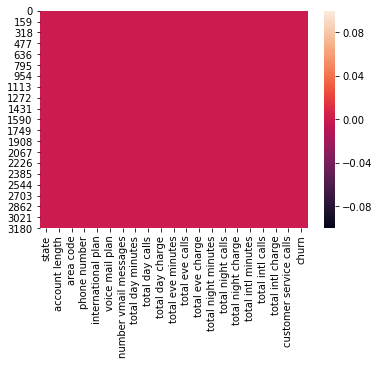

In [13]:
sns.heatmap(df.isnull())

In [14]:
df = pd.DataFrame(data=df)
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [15]:
#Check the Uniqueness of some columns
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [16]:
df['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df['churn'].unique()

array([False,  True])

In [20]:
#Dataset to Numeric(boolean) Format
#For all those columns who has 2 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==2):
        le_anima = preprocessing.LabelEncoder()
        df[cols] = le_anima.fit_transform(df[cols])

In [21]:
data1 = pd.get_dummies(df['state'])

In [22]:
df['state']=data1

In [23]:
#Phone No is not required to predict the output churn
df.drop('phone number',axis=1,inplace=True)
df

state  account length  area code  international plan  voice mail plan  \
0         0             128        415                   0                1   
1         0             107        415                   0                1   
2         0             137        415                   0                0   
3         0              84        408                   1                0   
4         0              75        415                   1                0   
...     ...             ...        ...                 ...              ...   
3328      0             192        415                   0                1   
3329      0              68        415                   0                0   
3330      0              28        510                   0                0   
3331      0             184        510                   1                0   
3332      0              74        415                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328               

In [25]:
df.describe()  #statictics view

state  account length    area code  international plan  \
count  3333.000000     3333.000000  3333.000000         3333.000000   
mean      0.015602      101.064806   437.182418            0.096910   
std       0.123947       39.822106    42.371290            0.295879   
min       0.000000        1.000000   408.000000            0.000000   
25%       0.000000       74.000000   408.000000            0.000000   
50%       0.000000      101.000000   415.000000            0.000000   
75%       0.000000      127.000000   510.000000            0.000000   
max       1.000000      243.000000   510.000000            1.000000   

       voice mail plan  number vmail messages  total day minutes  \
count      3333.000000            3333.000000        3333.000000   
mean          0.276628               8.099010         179.775098   
std           0.447398              13.688365          54.467389   
min           0.000000               0.000000           0.000000   
25%           0.000000               0.000000         143.700000   
50%           0.000000               0.000000         179.400000   
75%           1.000000              20.000000         216.400000   
max           1.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls        churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

In [26]:
#Co-relation
dfcor=df.corr()
dfcor

state  account length  area code  \
state                   1.000000       -0.012244   0.004487   
account length         -0.012244        1.000000  -0.012463   
area code               0.004487       -0.012463   1.000000   
international plan     -0.008505        0.024735   0.048551   
voice mail plan         0.008743        0.002918  -0.000747   
number vmail messages   0.008818       -0.004628  -0.001994   
total day minutes      -0.003214        0.006216  -0.008264   
total day calls        -0.032413        0.038470  -0.009646   
total day charge       -0.003216        0.006214  -0.008264   
total eve minutes      -0.041457       -0.006757   0.003580   
total eve calls        -0.022356        0.019260  -0.011886   
total eve charge       -0.041457       -0.006745   0.003607   
total night minutes    -0.021274       -0.008955  -0.005825   
total night calls      -0.017769       -0.013176   0.016522   
total night charge     -0.021273       -0.008960  -0.005845   
total intl minutes     -0.009835        0.009514  -0.018288   
total intl calls        0.016792        0.020661  -0.024179   
total intl charge      -0.009888        0.009546  -0.018395   
customer service calls -0.000494       -0.003796   0.027572   
churn                  -0.031194        0.016541   0.006174   

                        international plan  voice mail plan  \
state                            -0.008505         0.008743   
account length                    0.024735         0.002918   
area code                         0.048551        -0.000747   
international plan                1.000000         0.006006   
voice mail plan                   0.006006         1.000000   
number vmail messages             0.008745         0.956927   
total day minutes                 0.049396        -0.001684   
total day calls                   0.003755        -0.011086   
total day charge                  0.049398        -0.001686   
total eve minutes                 0.019100         0.021545   
total eve calls                   0.006114        -0.006444   
total eve charge                  0.019106         0.021559   
total night minutes              -0.028905         0.006079   
total night calls                 0.012451         0.015553   
total night charge               -0.028913         0.006064   
total intl minutes                0.045871        -0.001318   
total intl calls                  0.017366         0.007618   
total intl charge                 0.045780        -0.001276   
customer service calls           -0.024522        -0.017824   
churn                             0.259852        -0.102148   

                        number vmail messages  total day minutes  \
state                                0.008818          -0.003214   
account length                      -0.004628           0.006216   
area code                           -0.001994          -0.008264   
international plan                   0.008745           0.049396   
voice mail plan                      0.956927          -0.001684   
number vmail messages                1.000000           0.000778   
total day minutes                    0.000778           1.000000   
total day calls                     -0.009548           0.006750   
total day charge                     0.000776           1.000000   
total eve minutes                    0.017562           0.007043   
total eve calls                     -0.005864           0.015769   
total eve charge                     0.017578           0.007029   
total night minutes                  0.007681           0.004323   
total night calls                    0.007123           0.022972   
total night charge                   0.007663           0.004300   
total intl minutes                   0.002856          -0.010155   
total intl calls                     0.013957           0.008033   
total intl charge                    0.002884          -0.010092   
customer service calls              -0.013263          -0.013423   
churn              

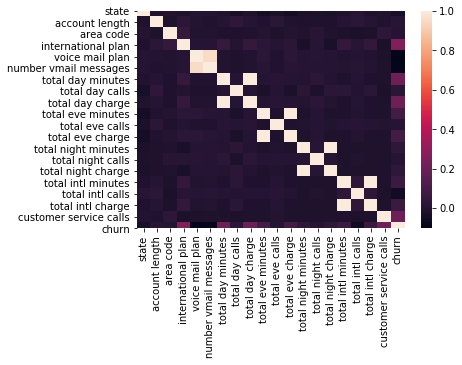

In [27]:
sns.heatmap(dfcor)

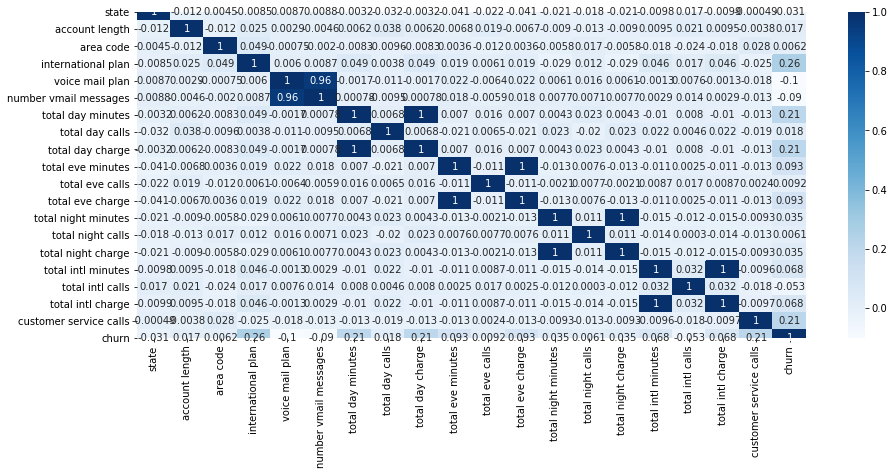

In [28]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

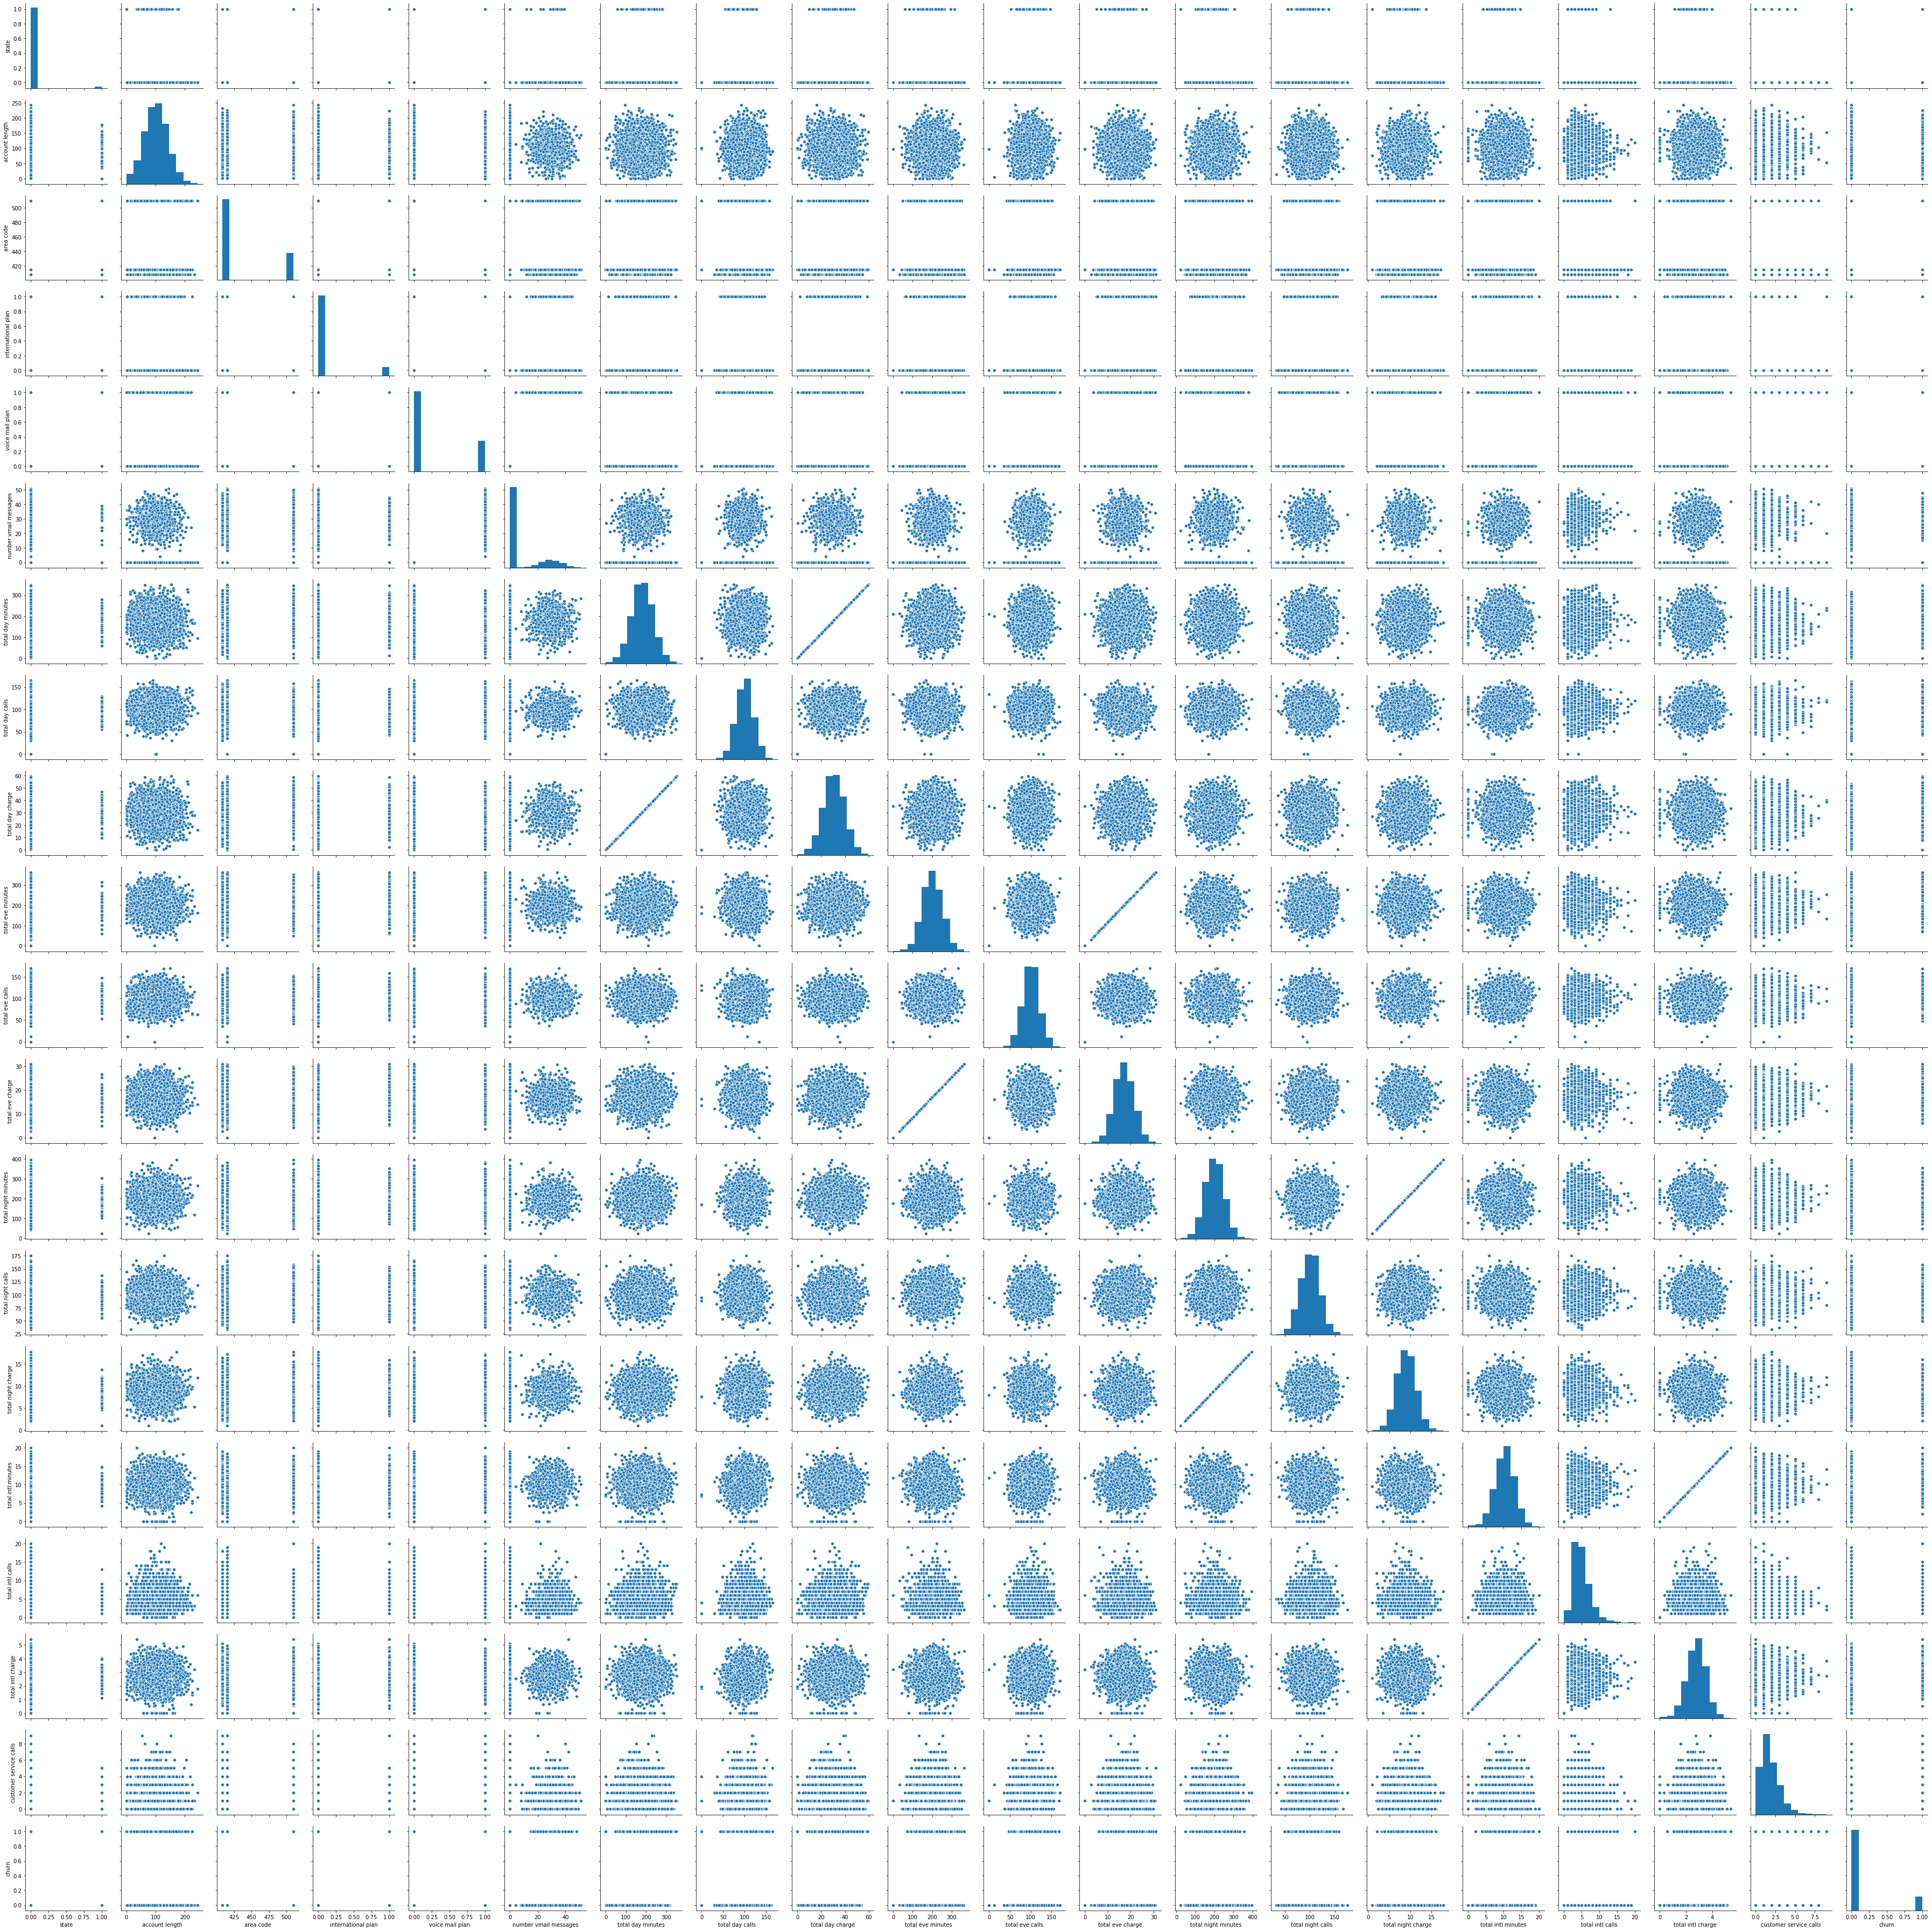

In [29]:
sns.pairplot(df)

In [30]:
#finding the skewness

df.skew()

state                     7.820937
account length            0.096606
area code                 1.126823
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [31]:
#there is a some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()

state                     7.820937
account length            0.096606
area code                 1.122881
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.028178
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls         -0.199368
total intl charge        -0.245287
customer service calls   -0.138568
churn                     2.018356
dtype: float64

In [32]:
#finding/removing the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (3333, 20)
df1.shape: (2889, 20)
z value is: [[0.12589212 0.67648946 0.51684318 ... 0.0856905  0.22682722 0.41167182]
 [0.12589212 0.14906505 0.51684318 ... 1.2411686  0.22682722 0.41167182]
 [0.12589212 0.9025285  0.51684318 ... 0.69715637 1.5607056  0.41167182]
 ...
 [0.12589212 1.83505538 1.71785261 ... 1.3871231  0.55344162 0.41167182]
 [0.12589212 2.08295458 1.71785261 ... 1.87695028 0.55344162 0.41167182]
 [0.12589212 0.67974475 0.51684318 ... 1.2411686  1.5607056  0.41167182]]


In [33]:
df['churn'].unique()

array([0.        , 0.69314718])

In [34]:
array = df['churn']

array.shapearray = df['churn']

array.shape

(3333,)

In [37]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
data1=le.fit_transform(df['churn'])
data1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
df['churn']=data1

In [39]:
df['churn'].unique()

array([0, 1], dtype=int64)

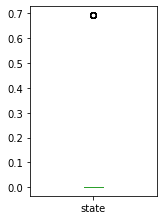

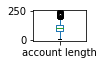

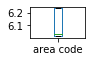

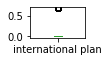

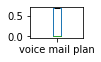

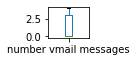

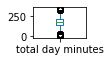

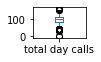

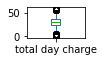

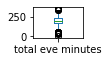

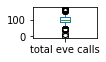

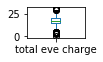

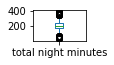

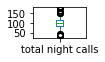

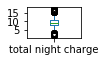

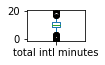

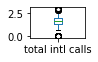

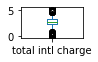

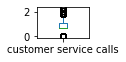

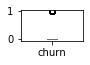

In [40]:
#Boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

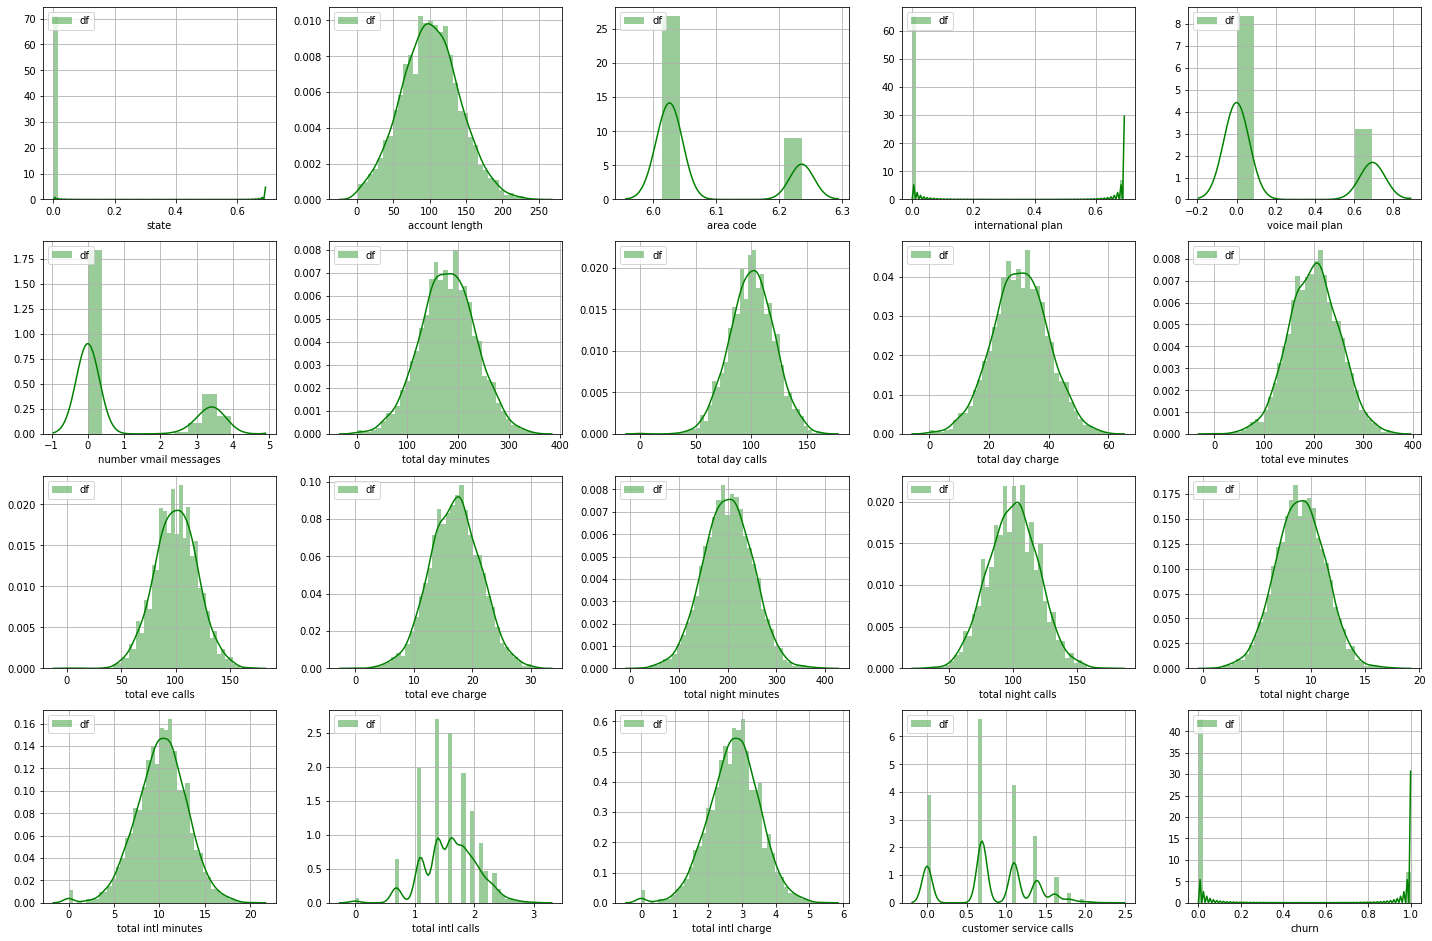

In [41]:
#Plotting Displot Through Iteratio
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

In [42]:
df.keys()

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

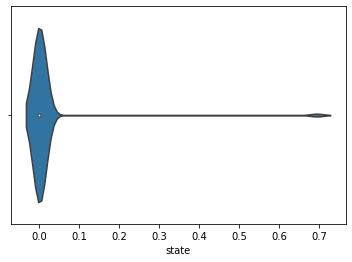

In [43]:
#violin plot representation with respect to each column

sns.violinplot(x="state",data=df)

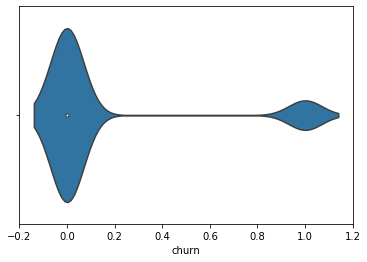

In [44]:
#violin plot representation with respect to each column

sns.violinplot(x="churn",data=df)

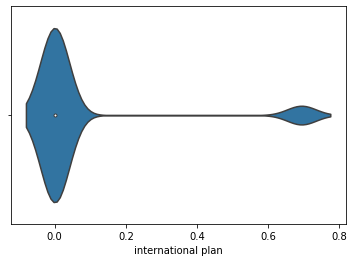

In [45]:
#violin plot representation with respect to each column

sns.violinplot(x="international plan",data=df)

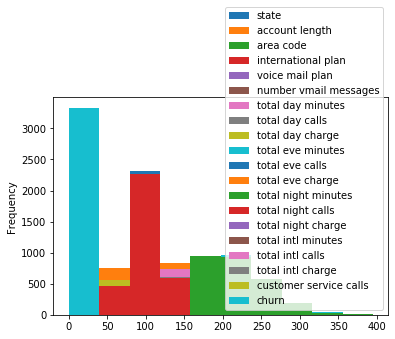

In [46]:
df.plot.hist()

In [47]:
df.keys()

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

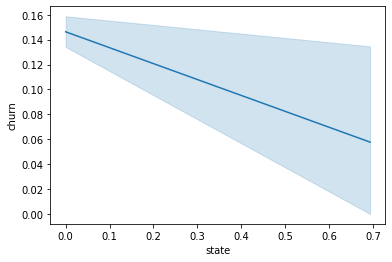

In [48]:
#Line plot representation
sns.lineplot(df["state"],df["churn"])
plt.show()

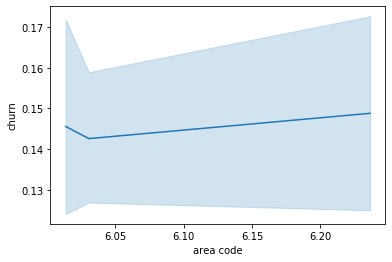

In [49]:
sns.lineplot(df["area code"],df["churn"])
plt.show()

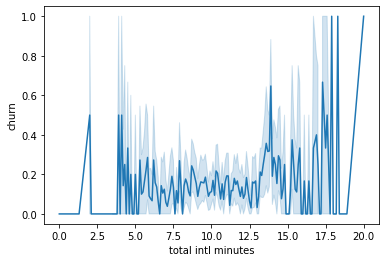

In [50]:
sns.lineplot(df["total intl minutes"],df["churn"])
plt.show()

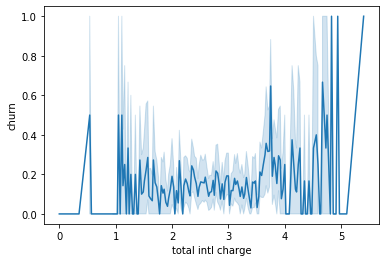

In [51]:
sns.lineplot(df["total intl charge"],df["churn"])
plt.show()

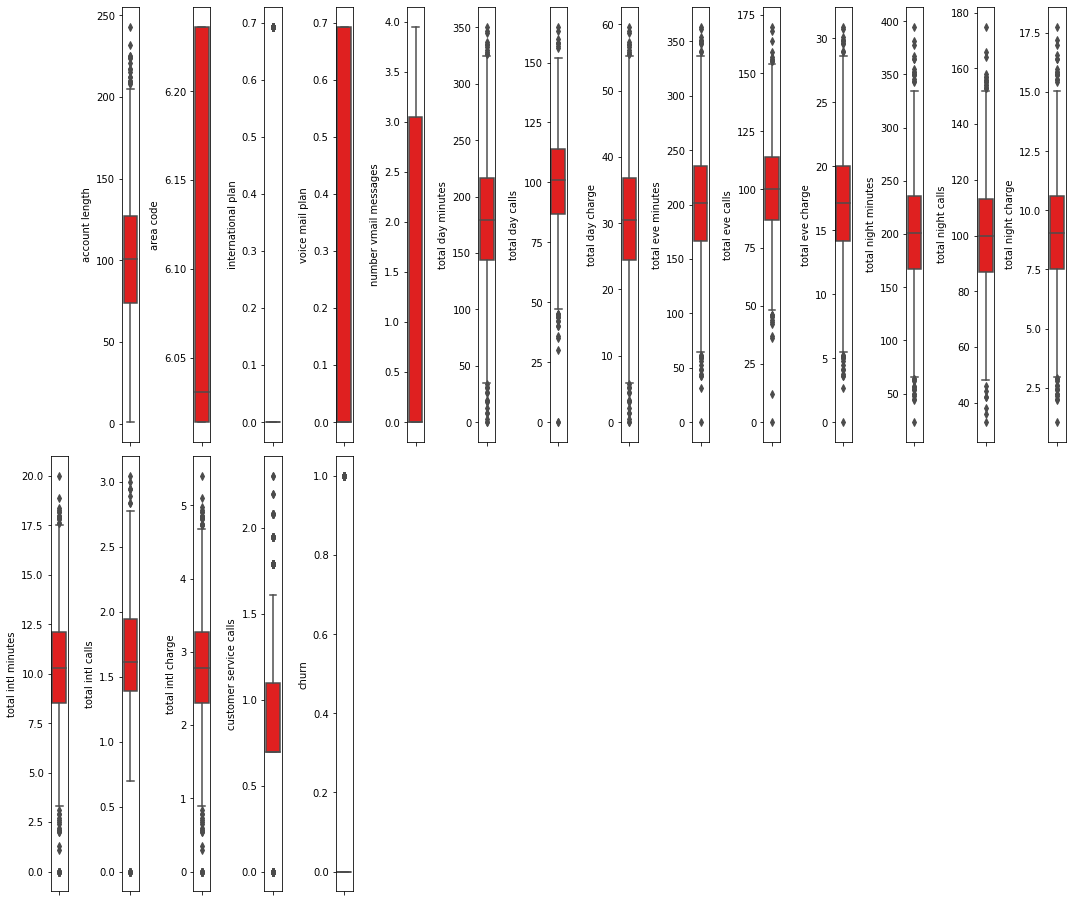

In [52]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

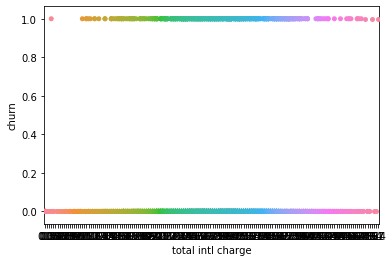

In [53]:
#strip plot representation

ax=sns.stripplot(x='total intl charge',y="churn",data=df);

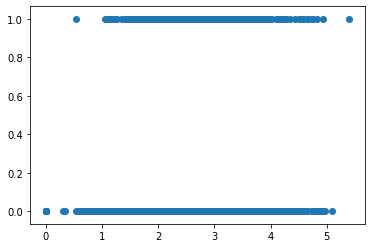

In [54]:
#using Scatter Plot
plt.scatter(df["total intl charge"],df["churn"])

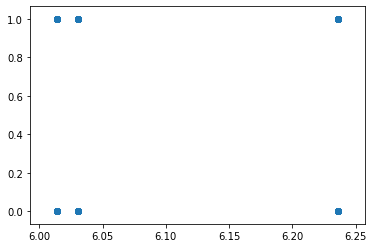

In [55]:
#using Scatter Plot
plt.scatter(df["area code"],df["churn"])

In [56]:
#Separating X and Y Variable to predict the dataset

X = df.drop("churn", axis=1)
X

state  account length  area code  international plan  voice mail plan  \
0       0.0             128   6.030685            0.000000         0.693147   
1       0.0             107   6.030685            0.000000         0.693147   
2       0.0             137   6.030685            0.000000         0.000000   
3       0.0              84   6.013715            0.693147         0.000000   
4       0.0              75   6.030685            0.693147         0.000000   
...     ...             ...        ...                 ...              ...   
3328    0.0             192   6.030685            0.000000         0.693147   
3329    0.0              68   6.030685            0.000000         0.000000   
3330    0.0              28   6.236370            0.000000         0.000000   
3331    0.0             184   6.236370            0.693147         0.000000   
3332    0.0              74   6.030685            0.000000         0.693147   

      number vmail messages  total day minutes  total day calls  \
0                  3.258097              265.1              110   
1                  3.295837              161.6              123   
2                  0.000000              243.4              114   
3                  0.000000              299.4               71   
4                  0.000000              166.7              113   
...                     ...                ...              ...   
3328               3.610918              156.2               77   
3329               0.000000              231.1               57   
3330               0.000000              180.8              109   
3331               0.000000              213.8              105   
3332               3.258097              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0          1.386294               2.70   
1                   13.7          1.386294               3.70   
2                   12.2          1.791759               3.29   
3                    6.6          2.079442               1.78   
4                   10.1          1.386294               2.73   
...                  ...               ...                ...   
3328               

In [57]:
Y = df["churn"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [58]:
X.shape

(3333, 19)

In [59]:
Y.shape

(3333,)

In [60]:
Y = Y.values.reshape(-1,1)
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [66]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [67]:
train_X.shape

(2599, 19)

In [68]:
train_Y.shape

(2599, 1)

In [69]:
test_Y.shape

(734, 1)

In [70]:
test_X.shape

(734, 19)

In [71]:
#Applying Logistic Regression
lg=LogisticRegression()
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
pred=lg.predict(test_X)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

In [73]:
print("accuracy score:",accuracy_score(pred,test_Y))
print(confusion_matrix(test_Y,pred))
print(classification_report(test_Y,pred))

accuracy score: 0.8732970027247956
[[626  12]
 [ 81  15]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       638
           1       0.56      0.16      0.24        96

    accuracy                           0.87       734
   macro avg       0.72      0.57      0.59       734
weighted avg       0.84      0.87      0.84       734



In [77]:
#Using Cross Validation to Check Overfitting,Underfitting and Predict the dataset
from sklearn.model_selection import cross_val_score
cvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print('cvlg1:',cvlg1)

cvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print('cvlg2:',cvlg2)

cvlg1: 0.8658817500134866
cvlg2: 0.8646817220808252


In [78]:
#Grid Search Cross Validation for Logistic Regression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

print()

lg2=LogisticRegression(C=1.0,penalty="l1")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.8634090034628703

score 0.8705722070844687


In [79]:
#Boost the Dataset by AdaBoost and GradiantBoost
#Boost the Dataset by AdaBoost 
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

print("-----\n")


#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.8953443632166218
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

0.952316076294278

In [80]:
#Boosting though GradientBoost Regressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.7635733344466433
R2 sq:  0.7635733344466433
Mean squared error: 0.04
Test Variance score: 0.68


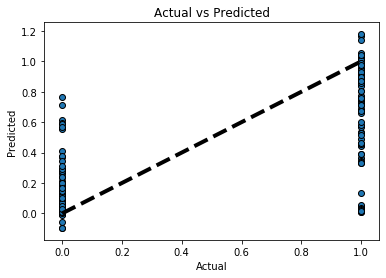

In [82]:
# Visualize the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_title("Actual vs Predicted")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.show()

In [83]:
#Using Naive Bayes Alg
gb=GaussianNB()
gb.fit(train_X,train_Y)


predgb = gb.predict(test_X)
print("accuracy score:",accuracy_score(predgb,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,predgb))
print("classification_report:\n",classification_report(test_Y,predgb))

accuracy score: 0.8610354223433242
confusion_matrix: 
 [[583  55]
 [ 47  49]]
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       638
           1       0.47      0.51      0.49        96

    accuracy                           0.86       734
   macro avg       0.70      0.71      0.70       734
weighted avg       0.87      0.86      0.86       734



In [84]:
#Gaussian NB by using Crossval Score
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
gbn=GaussianNB()

score=cross_val_score(gbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(gbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.82959641 0.87892377 0.86995516 0.87837838 0.84234234 0.85585586
 0.85585586 0.8963964  0.9009009  0.9009009  0.83783784 0.91891892
 0.86486486 0.85135135 0.86486486]
Mean Scores 0.8697962536527559
Standard deviation 0.025008261853878996
Y Prediction values
[0 0 0 ... 0 1 0]


array([[2605,  245],
       [ 201,  282]], dtype=int64)

In [85]:
#using Support Vector Machine
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print("accuracy score:",accuracy_score(predsvc,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,predsvc))
print("classification_report:\n",classification_report(test_Y,predsvc))

accuracy score: 0.8692098092643051
confusion_matrix: 
 [[638   0]
 [ 96   0]]
classification_report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       638
           1       0.00      0.00      0.00        96

    accuracy                           0.87       734
   macro avg       0.43      0.50      0.47       734
weighted avg       0.76      0.87      0.81       734



In [86]:
#Support Vector Machine by using Crossval Scor
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.85457271 0.85457271 0.85457271 0.85585586 0.85585586]
Mean Scores 0.8550859705282494
Standard Deviation 0.0006286087376971031
Y Prediction values
[0 0 0 ... 0 0 0]


0.8550855085508551

In [87]:
#GridSearchCV for Support Vector Machine
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.851, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.851, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.851, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.851, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.851, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.851, total=   1.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.851, total=   0.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.851, total=   0.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.851, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   54.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [88]:
# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [89]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       638
           1       0.80      0.33      0.47        96

    accuracy                           0.90       734
   macro avg       0.85      0.66      0.71       734
weighted avg       0.89      0.90      0.88       734



In [90]:
# Using DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print("accuracy score:",accuracy_score(preddtc,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,preddtc))
print("classification_report:\n",classification_report(test_Y,preddtc))

accuracy score: 0.9168937329700273
confusion_matrix: 
 [[596  42]
 [ 19  77]]
classification_report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       638
           1       0.65      0.80      0.72        96

    accuracy                           0.92       734
   macro avg       0.81      0.87      0.83       734
weighted avg       0.93      0.92      0.92       734



In [91]:
#DecisionTreeClassifier by using Crossval Scoree
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.80324484 0.83047989 0.85173033 0.82960526 0.83568723]
Mean Scores 0.8301495106368701
Standard Deviation 0.015624755870569135
Y Prediction values
[0 0 0 ... 0 0 0]


array([[2698,  152],
       [ 129,  354]], dtype=int64)

In [92]:
#using GridSearchCV for DecisionTreeClassifierr
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   31.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [93]:
# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 17, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [94]:
# Re-run predictions and see classification report 

g_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, g_predictions)) 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       638
           1       0.85      0.72      0.78        96

    accuracy                           0.95       734
   macro avg       0.91      0.85      0.87       734
weighted avg       0.94      0.95      0.94       734



In [95]:
#Boost Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [96]:
predictions = dtbclassifier.predict(test_X)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [97]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))
confusion_matrix(test_Y, predictions)

0.8692098092643051


array([[601,  37],
       [ 59,  37]], dtype=int64)

In [98]:
#using RandomForest Classificatior
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.952316076294278
[[635   3]
 [ 32  64]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       638
           1       0.96      0.67      0.79        96

    accuracy                           0.95       734
   macro avg       0.95      0.83      0.88       734
weighted avg       0.95      0.95      0.95       734



In [99]:
#RandomForestClassifier Using Cross_Val_Score

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.94011976 0.94610778 0.93413174 0.92792793 0.96096096 0.95195195
 0.94294294 0.94594595 0.95195195 0.96396396]
Mean Scores 0.9466004927082772
Standard Deviation 0.010607415916075095
Y Prediction values
[0 0 0 ... 0 0 0]
y_pred.shape (3333,)


array([[2833,   17],
       [ 181,  302]], dtype=int64)

In [100]:
#GridSearchCV for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 14.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [101]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       638
           1       0.99      0.69      0.81        96

    accuracy                           0.96       734
   macro avg       0.97      0.84      0.89       734
weighted avg       0.96      0.96      0.95       734



In [102]:
#Bagging of Random Forest Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
bagrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagrf.fit(train_X, train_Y)


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [103]:
predictionsrf = bagrf.predict(test_X)
predictionsrf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [104]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))
confusion_matrix(test_Y, predictionsrf)

0.8719346049046321


array([[637,   1],
       [ 93,   3]], dtype=int64)

# Among all models ,RF give (95%), grid_search_rf2 gives the highest accuracy(96%) so we are saving this model.

In [110]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 20_Customer_churn.csv')

In [111]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(grid_search_rf2,'Customer_churn.pkl')

['Customer_churn.pkl']